In [24]:
import matplotlib.pyplot as plt
import optuna
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from utils import load_final_data
from sklearn.utils import class_weight
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix
# from sklearn.qda import QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

In [25]:
X_train, X_val, X_test, y_train, y_val, y_test = load_final_data()
categories = list(y_train.columns)

In [26]:
work_features = [c for c in X_train.columns if not c.startswith('Cluster_number')]

X_train = X_train[work_features]
X_val = X_val[work_features]
X_test = X_test[work_features]

y_train = y_train.values.argmax(1)
y_val = y_val.values.argmax(1)
y_test = y_test.values.argmax(1)

In [27]:
X_arson_train=X_train[y_train==0]
X_debris_train=X_train[y_train==3]

X_arson_test=X_test[y_test==0]
X_debris_test=X_test[y_test==3]

In [ ]:
pd.DataFrame([X_arson_train.mean(),X_debris_train.mean()])['FIRE_DURATION_HRS']

In [ ]:
pd.DataFrame([X_arson_train.mean(),X_debris_train.mean()])

In [28]:
y_arson_debris_train=np.zeros(len(X_arson_train)+len(X_debris_train))
y_arson_debris_train[len(X_arson_train):]=1
X_arson_debris_train=np.vstack([X_arson_train,X_debris_train])

y_arson_debris_test=np.zeros(len(X_arson_test)+len(X_debris_test))
y_arson_debris_test[len(X_arson_test):]=1
X_arson_debris_test=np.vstack([X_arson_test,X_debris_test])

In [29]:
clf=RandomForestClassifier()
clf.fit(X_arson_debris_train,y_arson_debris_train)

RandomForestClassifier()

In [30]:
y_pred=clf.predict(X_arson_debris_test)
precision=precision_score(y_arson_debris_test,y_pred)
accuracy=accuracy_score(y_arson_debris_test,y_pred)
f1=f1_score(y_arson_debris_test,y_pred)
print("Precision:",precision)
print("Accuracy:",accuracy)
print("F1 score:",f1)

Precision: 0.7796002570259394
Accuracy: 0.7548516421789986
F1 score: 0.8055492460643334


[Text(0.5, 23.52222222222222, 'Predicted labels'),
 Text(50.722222222222214, 0.5, 'True labels')]

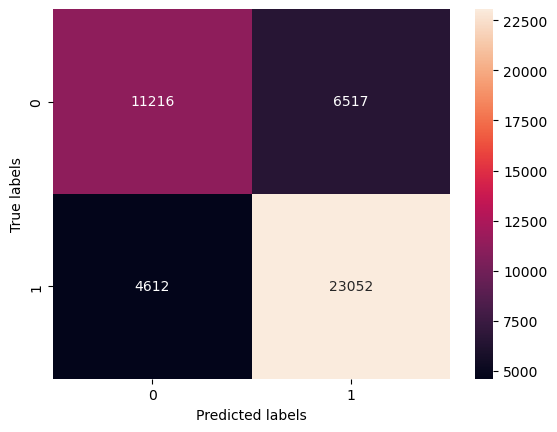

In [31]:
m = confusion_matrix(y_arson_debris_test, y_pred)
ax = sns.heatmap(m, annot=True, fmt='d')
ax.set(xlabel="Predicted labels", ylabel="True labels",)

In [ ]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_arson_debris_train,y_arson_debris_train)

In [ ]:
y_pred=qda.predict(X_arson_debris_test)
precision=precision_score(y_arson_debris_test,y_pred)
accuracy=accuracy_score(y_arson_debris_test,y_pred)
f1=f1_score(y_arson_debris_test,y_pred)
print("Precision:",precision)
print("Accuracy:",accuracy)
print("F1 score:",f1)

In [ ]:
m = confusion_matrix(y_arson_debris_test, y_pred)
ax = sns.heatmap(m, annot=True, fmt='d')
ax.set(xlabel="Predicted labels", ylabel="True labels",)

In [10]:
pca = PCA(n_components=5)  # define PCA object
X_pca = pca.fit_transform(X_arson_debris_train)  # fit model. Compute principal components

In [17]:
data=pd.DataFrame(X_pca)
data['y_pred']=y_arson_debris_train
data=data.sample(frac=1)

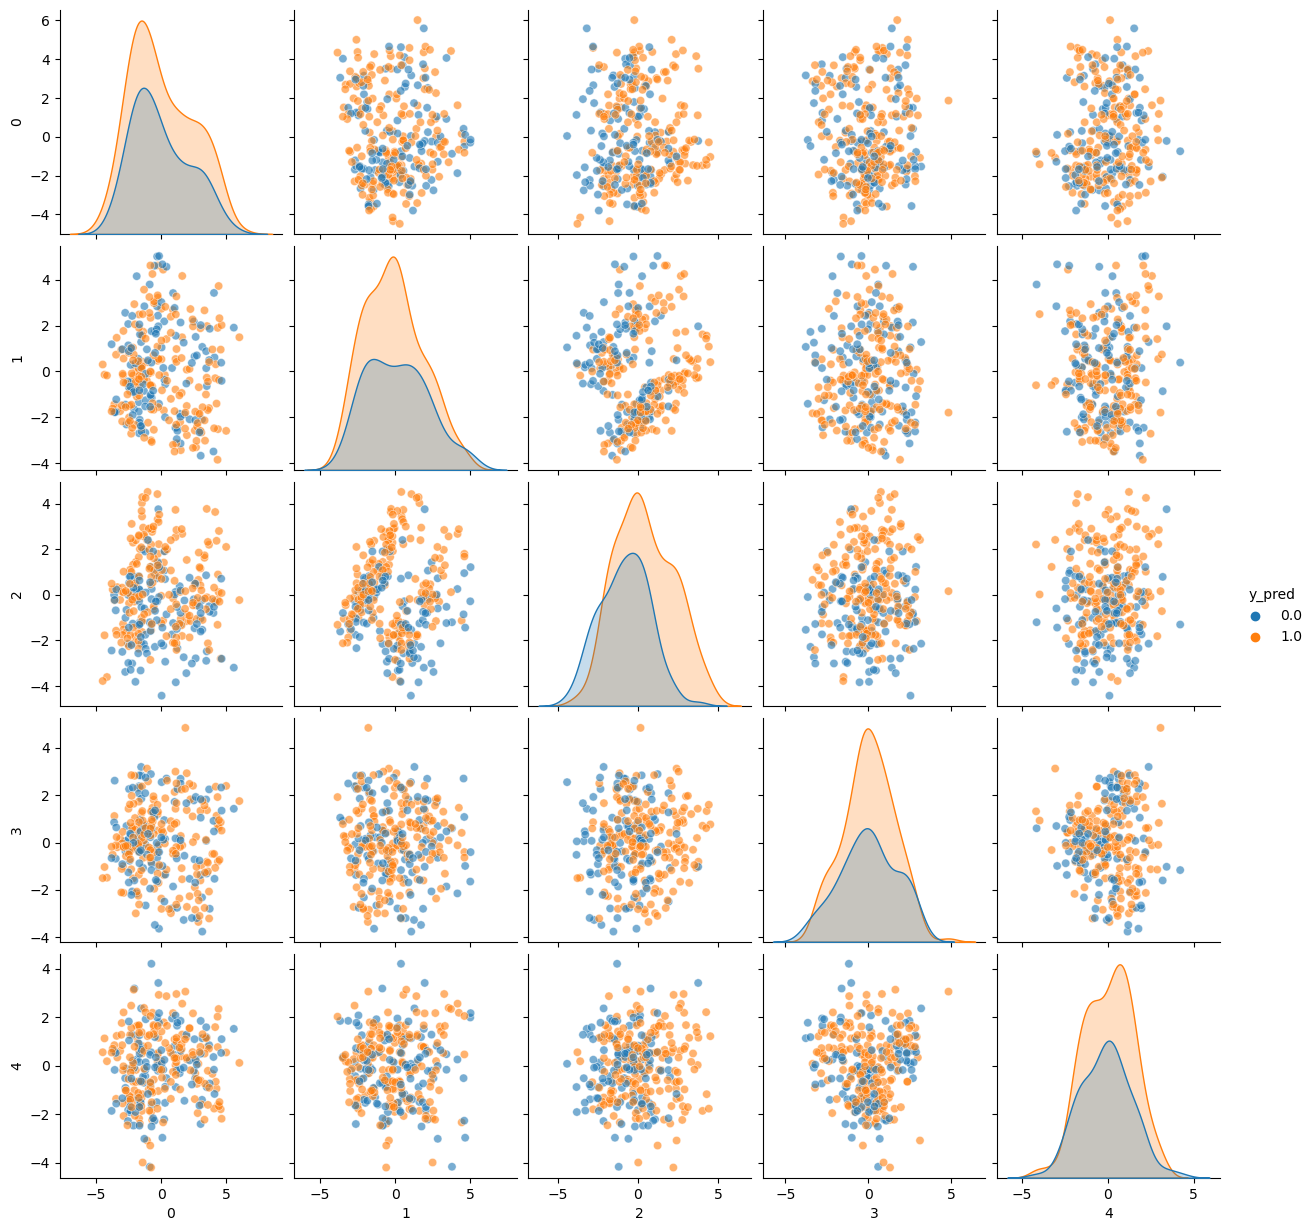

In [23]:
sns.pairplot(data.iloc[:300],hue='y_pred',plot_kws={'alpha': 0.6})